<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/Stochastic_SEIRDV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

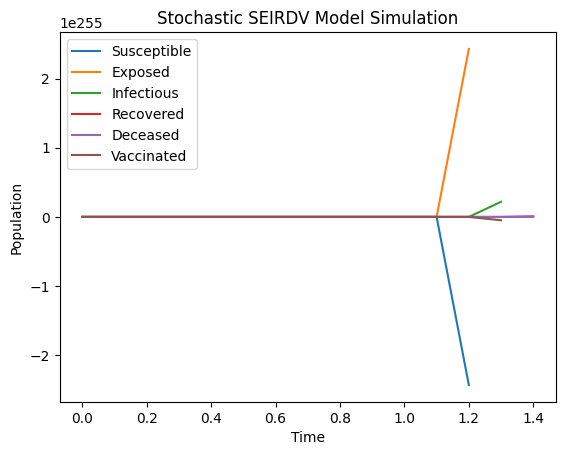

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the SEIRDV model
def simulate_SEIRDV(S0, E0, I0, R0, D0, V0, lambda_func, kappa, gamma, mu, rho_func, dt, T):
    num_steps = int(T / dt)
    S, E, I, R, D, V = [S0], [E0], [I0], [R0], [D0], [V0]

    for _ in range(num_steps):
        # Get current compartment values
        s, e, i, r, d, v = S[-1], E[-1], I[-1], R[-1], D[-1], V[-1]

        # Calculate rates
        lambda_t = lambda_func()
        rho_t = rho_func()

        # Stochastic fluctuations
        dW1 = np.random.normal(0, np.sqrt(dt))
        dW2 = np.random.normal(0, np.sqrt(dt))
        dW3 = np.random.normal(0, np.sqrt(dt))
        dW4 = np.random.normal(0, np.sqrt(dt))
        dW5 = np.random.normal(0, np.sqrt(dt))

        # Update compartments
        dE = lambda_t * s * i * dt + dW1
        dI = kappa * e * dt + dW2
        dR = gamma * i * dt + dW3
        dD = mu * i * dt + dW4
        dV = rho_t * s * dt + dW5

        S.append(s - dE)
        E.append(e + dE - dI)
        I.append(i + dI - dR - dD)
        R.append(r + dR)
        D.append(d + dD)
        V.append(v + dV)

    return S, E, I, R, D, V

# Example of time-dependent functions for lambda and rho
def lambda_func():
    return 0.4  # Constant contact rate for illustration

def rho_func():
    return 0.2  # Constant vaccination rate for illustration

# Parameters
S0 = 10000  # Initial susceptible population
E0 = 100    # Initial exposed population
I0 = 50     # Initial infectious population
R0 = 0     # Initial recovered population
D0 = 0     # Initial deceased population
V0 = 0     # Initial vaccinated population
kappa = 0.9  # Transition rate from exposed to infectious
gamma = 0.4  # Recovery rate
mu = 0.01   # Mortality rate
dt = 0.1   # Time step
T = 100    # Total time

# Simulate the model
S, E, I, R, D, V = simulate_SEIRDV(S0, E0, I0, R0, D0, V0, lambda_func, kappa, gamma, mu, rho_func, dt, T)

# Plotting
t = np.linspace(0, T, len(S))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infectious')
plt.plot(t, R, label='Recovered')
plt.plot(t, D, label='Deceased')
plt.plot(t, V, label='Vaccinated')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Stochastic SEIRDV Model Simulation')
plt.legend()
plt.show()
